In [8]:
#외부 모듈 수집
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
(t_x,t_y),(tt_x,tt_y) = keras.datasets.fashion_mnist.load_data()
s_t_x = t_x/255.0
s_tt_x=tt_x/255.0
from sklearn.model_selection import train_test_split
t_x, v_x, t_y, v_y = train_test_split(s_t_x,t_y ,test_size=0.2, random_state=42)
t_x.shape[1:]

(28, 28)

## 함수로 계층 생성

In [14]:
def s_my_m(l=None):
    m = keras.Sequential()
    m.add(keras.layers.Flatten(input_shape=(28,28)))
    if l:
        for i in l:
            m.add(i)        
    m.add(keras.layers.Dense(10,activation='softmax'))
    m.compile(loss='sparse_categorical_crossentropy',
          optimizer='adam',metrics='accuracy')
    return m


## 인공신경망생성

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5874 - accuracy: 0.7940 - val_loss: 0.4212 - val_accuracy: 0.8473
Epoch 2/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4396 - accuracy: 0.8411 - val_loss: 0.3825 - val_accuracy: 0.8599
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4052 - accuracy: 0.8555 - val_loss: 0.3703 - val_accuracy: 0.8669
Epoch 4/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3795 - accuracy: 0.8596 - val_loss: 0.3548 - val_accuracy: 0.8696
Epoch 5/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3675 - accuracy: 0.8664 - val_loss: 0.3449 - val_accuracy: 0.8737
Epoch 6/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3522 - accuracy: 0.8706 - val_loss: 0.3390 - val_accuracy: 0.8758
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3435 - accuracy: 0.8742 - val_loss: 0.3483 - val_accuracy:

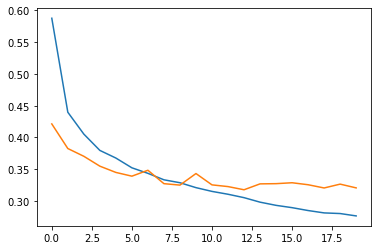

In [10]:
m = keras.Sequential()
m.add(keras.layers.Flatten(input_shape=(28,28)))
m.add(keras.layers.Dense(100,activation='relu'))
m.add(keras.layers.Dropout(0.3))
m.add(keras.layers.Dense(10,activation='softmax'))
#신경망의 구축
m.compile(loss='sparse_categorical_crossentropy',
          optimizer='adam',metrics='accuracy')
#콜백함수:동작중에 실행할 함수
ck_p = keras.callbacks.ModelCheckpoint('best_m.h',save_best_only=True)
hy = m.fit(t_x,t_y, epochs=20,validation_data=(v_x,v_y),callbacks=[ck_p])#콜백은 학습도중에 써야함
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])

In [11]:
m2 = keras.models.load_model('best_m.h')
m.evaluate(v_x,v_y)

375/375 [==============================] - 0s 781us/step - loss: 0.3206 - accuracy: 0.8839


[0.32059040665626526, 0.8839166760444641]

In [12]:
m2.evaluate(v_x,v_y)

375/375 [==============================] - 0s 858us/step - loss: 0.3176 - accuracy: 0.8855


[0.3176348805427551, 0.8855000138282776]

- 목표치 달성은 학습중에 일어난다

In [30]:
#loss 함수를 통해 학습을 하다보면
m1 =keras.Sequential()
m1.add(keras.layers.Flatten(input_shape=(28,28)))
m1.add(keras.layers.Dense(100,activation='relu'))
m1.add(keras.layers.Dropout(0.3))    
m1.add(keras.layers.Dense(10,activation='softmax'))
m1.compile(loss='sparse_categorical_crossentropy',
          optimizer='adam',metrics='accuracy')
#층수 높아지면 느려짐 왜냐 기억할게 많아져서
#얼리스타핑은 멈추는것 매개변수=검증점수  가 연속으로 안늘어나면 멈춘다
#restore_best_weights = 멈출때 그전 좋은모델로 돌아감
#평가점수 증가
ck_p = keras.callbacks.ModelCheckpoint('best1_m.h5',save_best_only=True)
e_st = keras.callbacks.EarlyStopping(patience=2)
m1.fit(t_x,t_y, epochs=20,validation_data=(v_x,v_y),callbacks=[ck_p,e_st])

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5908 - accuracy: 0.7902 - val_loss: 0.4308 - val_accuracy: 0.8435
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4415 - accuracy: 0.8400 - val_loss: 0.4073 - val_accuracy: 0.8497
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4003 - accuracy: 0.8543 - val_loss: 0.3777 - val_accuracy: 0.8605
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3828 - accuracy: 0.8593 - val_loss: 0.3588 - val_accuracy: 0.8686
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3644 - accuracy: 0.8680 - val_loss: 0.3557 - val_accuracy: 0.8677
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3553 - accuracy: 0.8699 - val_loss: 0.3576 - val_accuracy: 0.8696
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3435 - accuracy: 0.8748 - val_loss: 0.3355 - val_accuracy:

In [31]:
m1.evaluate(v_x,v_y)

375/375 [==============================] - 0s 810us/step - loss: 0.3265 - accuracy: 0.8819


[0.3264635503292084, 0.8819166421890259]

In [32]:
m2 = keras.models.load_model('best1_m.h5')
m2.evaluate(v_x,v_y)

375/375 [==============================] - 0s 789us/step - loss: 0.3248 - accuracy: 0.8821


[0.3248487412929535, 0.8820833563804626]

In [36]:
def sig(x):
    return 1/(1+np.exp(-x))

(-5.0, 5.0, -0.2, 1.2)

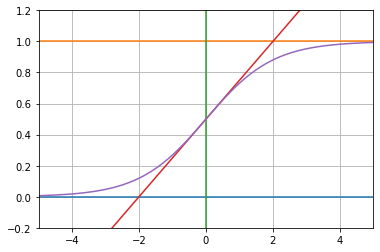

In [39]:
x = np.linspace(-5,5,200)
plt.plot([-5,5],[0,0])
plt.plot([-5,5],[1,1])
plt.plot([0,0],[-0.2,1.2])
plt.plot([-5,5],[-3/4,7/4])
plt.plot(x,sig(x))
plt.grid(True)
plt.axis([-5,5,-0.2,1.2])

In [ ]:
# 심층학습